In [32]:
import sqlite3
import pandas as pd

con = sqlite3.connect(r"PLACEHOLDER.db")
cur = con.cursor()
table = cur.execute('''select * from cademycode_students''').fetchall()

column_names1 = [description[0] for description in cur.description]

df = pd.DataFrame(table, columns = column_names1)

#display(df.head())
#------------------------------------------------------------------------------------------------------------------------

table = cur.execute('''select * from cademycode_courses''').fetchall()

column_names2 = [description[0] for description in cur.description]

df1 = pd.DataFrame(table, columns = column_names2)
#display(df1.head())
#------------------------------------------------------------------------------------------------------------------------------

table = cur.execute('''select * from cademycode_student_jobs''').fetchall()

column_names3 = [description[0] for description in cur.description]

df2 = pd.DataFrame(table, columns = column_names3)
#display(df2.head())

#--------------------------------------------------------------------------------------------------------------------------

table = cur.execute('''select * from cademycode_students as cs left join cademycode_courses as cc on cs.current_career_path_id = cc.career_path_id left join cademycode_student_jobs as csj on cs.job_id = csj.job_id''').fetchall()

column_names4 = [description[0] for description in cur.description]

new_df = pd.DataFrame(table, columns = column_names4)

new_df.drop(columns = ['uuid','current_career_path_id','num_course_taken','job_id'],inplace=True)


display(new_df.head())

,name,dob,sex,contact_info,time_spent_hrs,career_path_id,career_path_name,hours_to_complete,job_category,avg_salary
0,Annabelle Avery,1943-07-03,F,"{""mailing_address"": ""303 N Timber Key, Irondal...",4.99,1.0,data scientist,20.0,HR,80000.0
1,Micah Rubio,1991-02-07,M,"{""mailing_address"": ""767 Crescent Fair, Shoals...",4.4,8.0,android developer,27.0,HR,80000.0
2,Hosea Dale,1989-12-07,M,"{""mailing_address"": ""P.O. Box 41269, St. Bonav...",6.74,8.0,android developer,27.0,HR,80000.0
3,Mariann Kirk,1988-07-31,F,"{""mailing_address"": ""517 SE Wintergreen Isle, ...",12.31,9.0,machine learning engineer,35.0,education,61000.0
4,Lucio Alexander,1963-08-31,M,"{""mailing_address"": ""18 Cinder Cliff, Doyles b...",5.64,3.0,data analyst,12.0,HR,80000.0


In [117]:
clean_df = new_df[(~new_df.career_path_name.isna()) & (new_df.sex != 'N')]

In [118]:
career = clean_df.groupby(['career_path_name', 'sex']).size().unstack(fill_value=0)
career = career.reindex(avg_salary.index)
M = career['M'].tolist()
F = career['F'].tolist()


avg_salary = clean_df.groupby('career_path_name')['avg_salary'].mean()
careers = avg_salary.index.tolist()

In [121]:
sex_mean_diff = clean_df.groupby('sex').avg_salary.mean().reset_inde
display(sex_mean_diff)

,sex,avg_salary
0,F,92515.282132
1,M,91454.762854


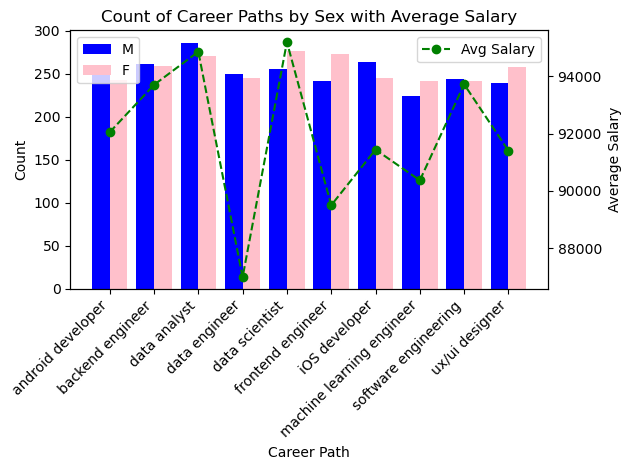

In [120]:
from matplotlib import pyplot as plt

def create_x(t, w, n, d):
    return [t*x + w*n for x in range(d)]
x1 = create_x(2,0.8,1,len(careers))
x2 = create_x(2,0.8,2,len(careers))
x_avg_salary = [(a + b) / 2 for a, b in zip(x1, x2)]


fig, ax = plt.subplots()
#create side-by-side bars
plt.bar(x1,M,color = 'blue',label = 'M')
plt.bar(x2,F,color = 'pink',label = 'F')
ax2 = ax.twinx()  # Create a secondary y-axis for the salary plot
ax2.plot(x_avg_salary, avg_salary, color='green', marker='o', label='Avg Salary', linestyle='--')

ax.set_xticks(x_avg_salary)  # Center the ticks between the bars
ax.set_xticklabels(careers, rotation=45, ha="right")

# Add labels and title
ax.set_xlabel('Career Path')
ax.set_ylabel('Count')
ax2.set_ylabel('Average Salary')
ax.set_title('Count of Career Paths by Sex with Average Salary')

# Add a legend for both plots
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

job_category,HR,analytics,creative,education,engineer,financial services,software developer,student
career_path_name,,,,,,,,
android developer,49,49,90,49,43,96,96,18
backend engineer,57,39,88,50,56,104,110,16
data analyst,41,53,100,42,45,138,112,25
data engineer,50,60,118,48,45,76,74,24
data scientist,36,49,90,40,48,118,128,22
frontend engineer,55,41,126,40,52,70,114,17
iOS developer,44,63,110,41,55,90,90,15
machine learning engineer,43,52,100,48,52,70,88,11
software engineering,42,51,94,45,52,100,90,11


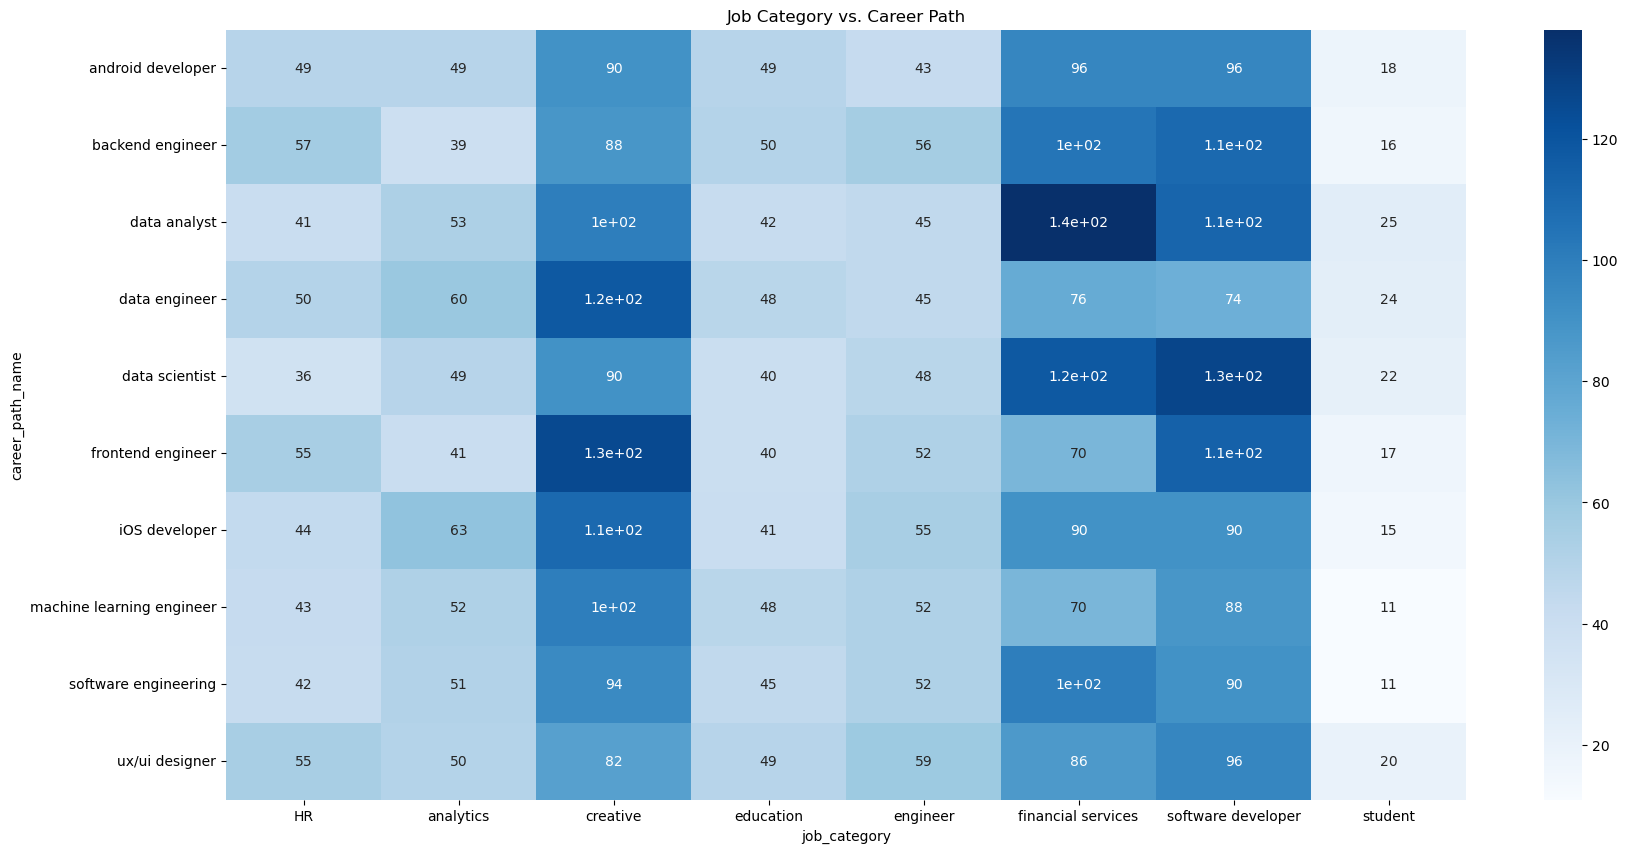

In [132]:
table = pd.crosstab(clean_df['career_path_name'], clean_df['job_category'])
display(table)

plt.figure(figsize=(20,10))
sns.heatmap(table, annot=True, cmap="Blues")
plt.title("Job Category vs. Career Path")
plt.show()